# Import Data 

In [224]:
import pandas as pd
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Fit Univariate Linear Regression 

In [225]:
X = boston['PTRATIO'].values[:, np.newaxis]
# Standardize Data
X = (X - X.mean()) / X.std()
# Add constant columns
X_linalg = np.c_[np.ones(X.shape[0]), X]

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['PTRATIO']
target = 'MEDV'

lr = LinearRegression()
lr.fit(X, boston[target])

beta_0 = lr.intercept_
beta_1 = lr.coef_[0]

print('beta 0:', beta_0)
print('beta 1:', beta_1)

beta 0: 22.532806324110673
beta 1: -4.665549929257671


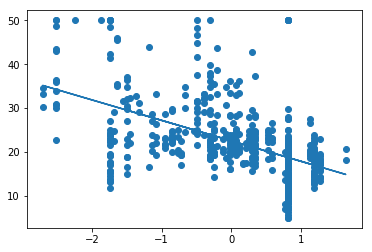

In [227]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
y_hat = [beta_1*x + beta_0 for x in X]
plt.plot(X, y_hat)
plt.show()

# Univariate Gradient Descent 

In [228]:
import numpy as np

In [235]:
# Hyperparameters
alpha = 0.02
iterations = 10000
theta = [np.random.uniform(-10,10), np.random.uniform(-10,10)]

# other parameters
n = len(boston)
np.random.seed(12)
y = boston['MEDV']

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    for i in range(iterations):
        prediction = np.dot(X_linalg, theta)
        error = prediction - y
        theta = theta - (alpha * (1/n)*np.dot(X_linalg.T, error))
        cost = np.dot(error.T, error)
        past_costs.append(cost)
    return theta, past_costs

final_theta, costs = gradient_descent(X_linalg, y, theta, iterations, alpha)

print('beta 0:', final_theta[0])
print('beta 1:', final_theta[0)

beta 0: 22.532806324110584


IndexError: invalid index to scalar variable.

In [233]:
final_theta[0]

22.532806324110584

In [ ]:
plt.title('Cost Reduction by Iteration')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(costs);

# Multivariate Gradient Descent

Implementation Based on: https://github.com/Tan-Moy/medium_articles/tree/master/art2_multivariate_linear_regression

In [ ]:
alpha = 0.02
iterations = 1000
theta = np.zeros([1,3])

features = ['AGE','TAX']
X = boston[features]
X = (X - X.mean())/X.std()
X_linalg = np.c_[np.ones(X.shape[0]), X]

y = (boston['MEDV'].values).reshape(-1,1)

In [ ]:
def compute_cost(X, y, theta):
    cost_mat = np.power( ( np.matmul(X, theta.T) - y ), 2)
    return np.sum(cost_mat)/(2 * n)

def gradientDescent(X, y, theta, iterations, alpha):
    cost = np.ones(iterations)
    for i in range(iterations):
        theta = theta - (alpha/n) * np.sum(X * (np.matmul(X, theta.T) - y), axis=0)
        cost[i] = compute_cost(X, y, theta)
    return theta, cost

theta, cost = gradientDescent(X_linalg, y, theta, iterations, alpha)
theta

print('beta 0:', theta[0][0])
print('beta 1:', theta[0][1])
print('beta 2:', theta[0][2])

In [ ]:
finalCost = compute_cost(X_linalg, y, theta)
finalCost

In [ ]:
plt.title('Cost Reduction by Iteration')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(cost);

# Multivariate Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['AGE','TAX']
target = 'MEDV'

lr = LinearRegression()
lr.fit(X, boston[target])

beta_0 = lr.intercept_
beta_1 = lr.coef_[0]
beta_2 = lr.coef_[1]

print('beta 0:', beta_0)
print('beta 1:', beta_1)
print('beta 2:', beta_2)